In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import shapely

In [2]:
df = pd.read_csv("./dataset/Mental health Depression disorder Data.csv", index_col="index")
df.head()

C:\Users\augus\AppData\Local\Temp\ipykernel_17036\1168623904.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./dataset/Mental health Depression disorder Data.csv", index_col="index")


Entity Code  Year Schizophrenia (%) Bipolar disorder (%)  \
index                                                                  
0      Afghanistan  AFG  1990           0.16056             0.697779   
1      Afghanistan  AFG  1991          0.160312             0.697961   
2      Afghanistan  AFG  1992          0.160135             0.698107   
3      Afghanistan  AFG  1993          0.160037             0.698257   
4      Afghanistan  AFG  1994          0.160022             0.698469   

      Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
index                                                                       
0                 0.101855               4.828830                1.677082   
1                 0.099313               4.829740                1.684746   
2                 0.096692               4.831108                1.694334   
3                 0.094336               4.830864                1.705320   
4                 0.092439               4.829423                1.716069   

       Depression (%)  Alcohol use disorders (%)  
index                                             
0            4.071831                   0.672404  
1            4.079531                   0.671768  
2            4.088358                   0.670644  
3            4.096190                   0.669738  
4            4.099582                   0.669260

In [3]:
df.describe()

Anxiety disorders (%)  Drug use disorders (%)  Depression (%)  \
count            6468.000000             6468.000000     6468.000000   
mean                3.989921                0.862278        3.497654   
std                 1.167526                0.460679        0.655859   
min                 2.023393                0.383650        2.139903   
25%                 3.188824                0.535064        3.005529   
50%                 3.554373                0.726430        3.499606   
75%                 4.682163                0.940157        3.912381   
max                 8.967330                3.452476        6.602754   

       Alcohol use disorders (%)  
count                6468.000000  
mean                    1.585821  
std                     0.860283  
min                     0.446940  
25%                     0.993685  
50%                     1.479936  
75%                     1.867834  
max                     5.474668

In [4]:
df.dtypes

Entity                        object
Code                          object
Year                          object
Schizophrenia (%)             object
Bipolar disorder (%)          object
Eating disorders (%)          object
Anxiety disorders (%)        float64
Drug use disorders (%)       float64
Depression (%)               float64
Alcohol use disorders (%)    float64
dtype: object

In [5]:
for column in df.columns:
    df.drop(df[df[column].isna()].index, inplace=True)
    df.reset_index(drop=True, inplace=True)

In [41]:
df[["Year", "Schizophrenia (%)", "Bipolar disorder (%)", "Eating disorders (%)"]] = df[["Year", "Schizophrenia (%)", "Bipolar disorder (%)", "Eating disorders (%)"]].astype(float)
df.dtypes

Entity                        object
Code                          object
Year                         float64
Schizophrenia (%)            float64
Bipolar disorder (%)         float64
Eating disorders (%)         float64
Anxiety disorders (%)        float64
Drug use disorders (%)       float64
Depression (%)               float64
Alcohol use disorders (%)    float64
dtype: object

In [7]:
df.describe()

Schizophrenia (%)  Bipolar disorder (%)  Eating disorders (%)  \
count        5488.000000           5488.000000           5488.000000   
mean            0.208183              0.716884              0.234023   
std             0.041998              0.164246              0.154147   
min             0.146902              0.314535              0.073908   
25%             0.179452              0.615732              0.121761   
50%             0.198510              0.693954              0.180378   
75%             0.230553              0.830217              0.278681   
max             0.375110              1.206597              0.943991   

       Anxiety disorders (%)  Drug use disorders (%)  Depression (%)  \
count            5488.000000             5488.000000     5488.000000   
mean                3.946979                0.833328        3.474504   
std                 1.134810                0.441199        0.671741   
min                 2.023393                0.383650        2.139903   
25%                 3.178912                0.524018        2.955355   
50%                 3.515140                0.709090        3.461421   
75%                 4.659540                0.906843        3.877343   
max                 8.967330                3.452476        6.602754   

       Alcohol use disorders (%)  
count                5488.000000  
mean                    1.562273  
std                     0.861973  
min                     0.446940  
25%                     0.961545  
50%                     1.466906  
75%                     1.853683  
max                     5.474668

In [8]:
df.mean().sort_values()

C:\Users\augus\AppData\Local\Temp\ipykernel_17036\4016324151.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean().sort_values()


Schizophrenia (%)            0.208183
Eating disorders (%)         0.234023
Bipolar disorder (%)         0.716884
Drug use disorders (%)       0.833328
Alcohol use disorders (%)    1.562273
Depression (%)               3.474504
Anxiety disorders (%)        3.946979
Year                              inf
dtype: float64

In [9]:
df.drop(df[df["Entity"] == "World"].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
df_code_mean = df.groupby(["Entity"]).mean().reset_index(names=["Entity"])
df_code_mean

C:\Users\augus\AppData\Local\Temp\ipykernel_17036\930400752.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_code_mean = df.groupby(["Entity"]).mean().reset_index(names=["Entity"])


Entity  Schizophrenia (%)  Bipolar disorder (%)  \
0       Afghanistan           0.162974              0.702354   
1           Albania           0.196544              0.700091   
2           Algeria           0.194960              0.809903   
3    American Samoa           0.249785              0.467095   
4           Andorra           0.264492              0.964324   
..              ...                ...                   ...   
190       Venezuela           0.203974              0.775802   
191         Vietnam           0.233554              0.545323   
192           Yemen           0.171712              0.733302   
193          Zambia           0.160916              0.602382   
194        Zimbabwe           0.159751              0.607422   

     Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
0                0.094261               4.848102                2.120798   
1                0.145230               3.368903                0.498765   
2                0.194488               5.011396                1.540640   
3                0.181259               3.293312                0.759355   
4                0.621480               5.279751                0.885044   
..                    ...                    ...                     ...   
190              0.272117               2.856071                0.615339   
191              0.102642               2.035264                0.648821   
192              0.129697               4.833025                1.243692   
193              0.123559               3.560979                0.510522   
194              0.131002               3.091770                0.748766   

     Depression (%)  Alcohol use disorders (%)  
0          4.118622                   0.663151  
1          2.190442                   1.746757  
2          3.657743                   0.653712  
3          2.940850                   1.135266  
4          3.739451                   1.224082  
..              ...                        ...  
190        2.802217                   1.353729  
191        2.910582                   1.597560  
192        4.004947                   0.631849  
193        3.553940                   1.639368  
194        3.103040                   1.488051  

[195 rows x 8 columns]

In [11]:
geo_df = gpd.read_file("./data/countries-land-10km.geo.json")
geo_df.head()

A3                                           geometry
0  CPV  MULTIPOLYGON (((-24.39000 14.81000, -24.50000 ...
1  BES  POLYGON ((-68.31000 12.20000, -68.39000 12.310...
2  LIE  POLYGON ((9.53000 47.27000, 9.61000 47.06000, ...
3  IMN  POLYGON ((-4.46000 54.17000, -4.79000 54.06000...
4  PNG  MULTIPOLYGON (((140.91000 -6.56000, 141.00000 ...

In [12]:
geo_df.shape

(220, 2)

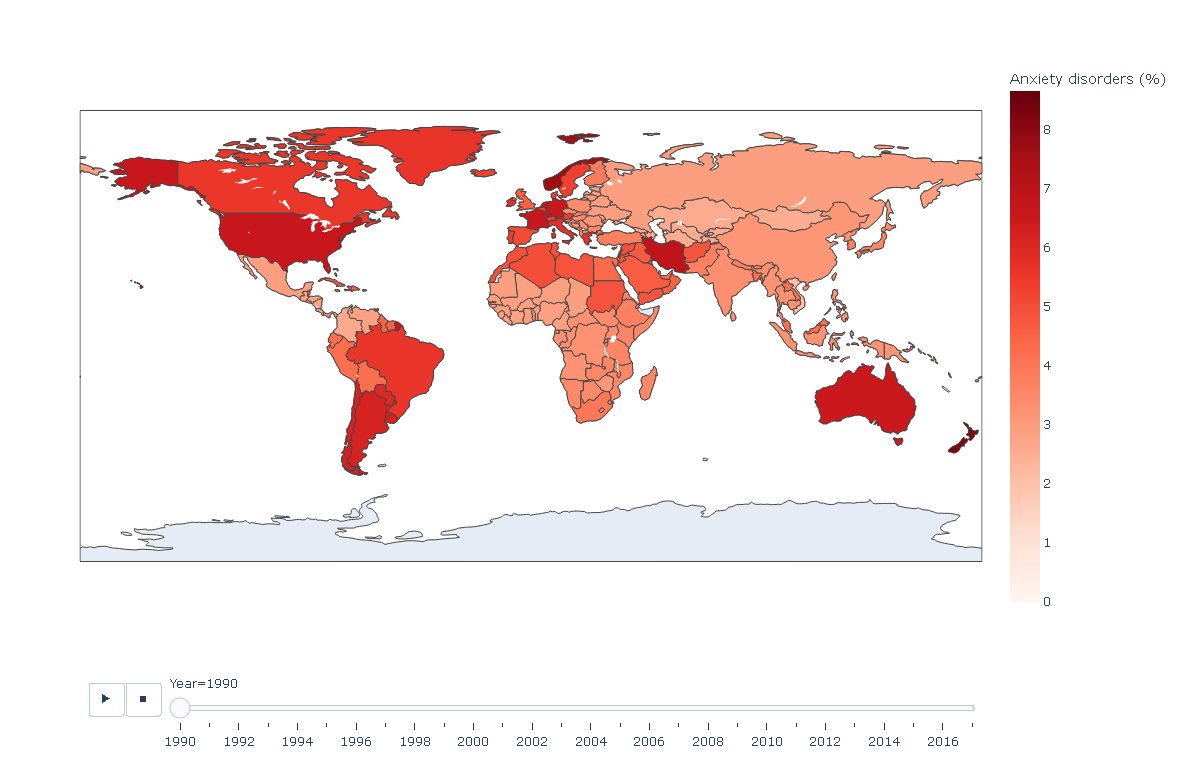

In [13]:
fig = px.choropleth(
                    df,
                    locations='Entity',
                    locationmode="country names",
                    color='Anxiety disorders (%)', 
                    color_continuous_scale="Reds", 
                    range_color=(0, df_code_mean['Anxiety disorders (%)'].max()), 
                    hover_data = ['Anxiety disorders (%)'],
                    animation_frame="Year",
                    width=1024,
                    height=768
                   )

fig.show()

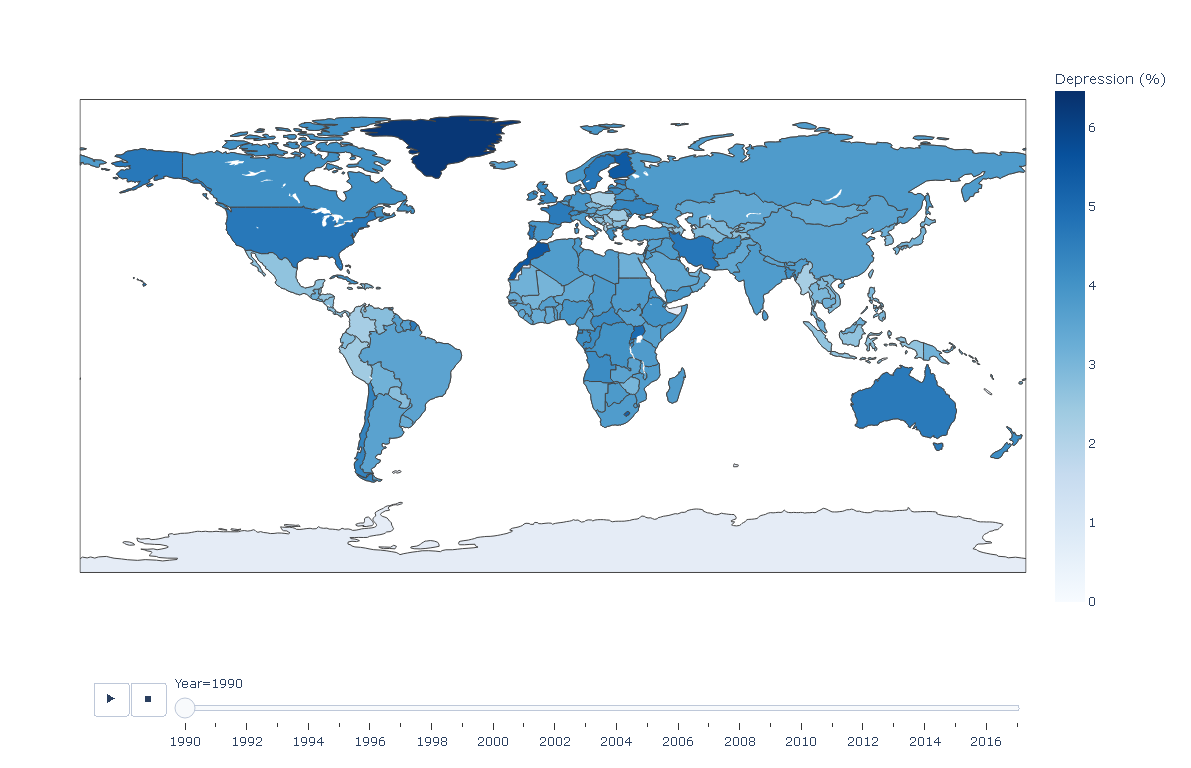

In [14]:
fig = px.choropleth(
                    df,
                    locations='Entity',
                    locationmode="country names",
                    color='Depression (%)', 
                    color_continuous_scale="Blues", 
                    range_color=(0, df_code_mean['Depression (%)'].max()), 
                    hover_data = ['Depression (%)'],
                    animation_frame="Year",
                    width=1024,
                    height=768
                   )

fig.show()

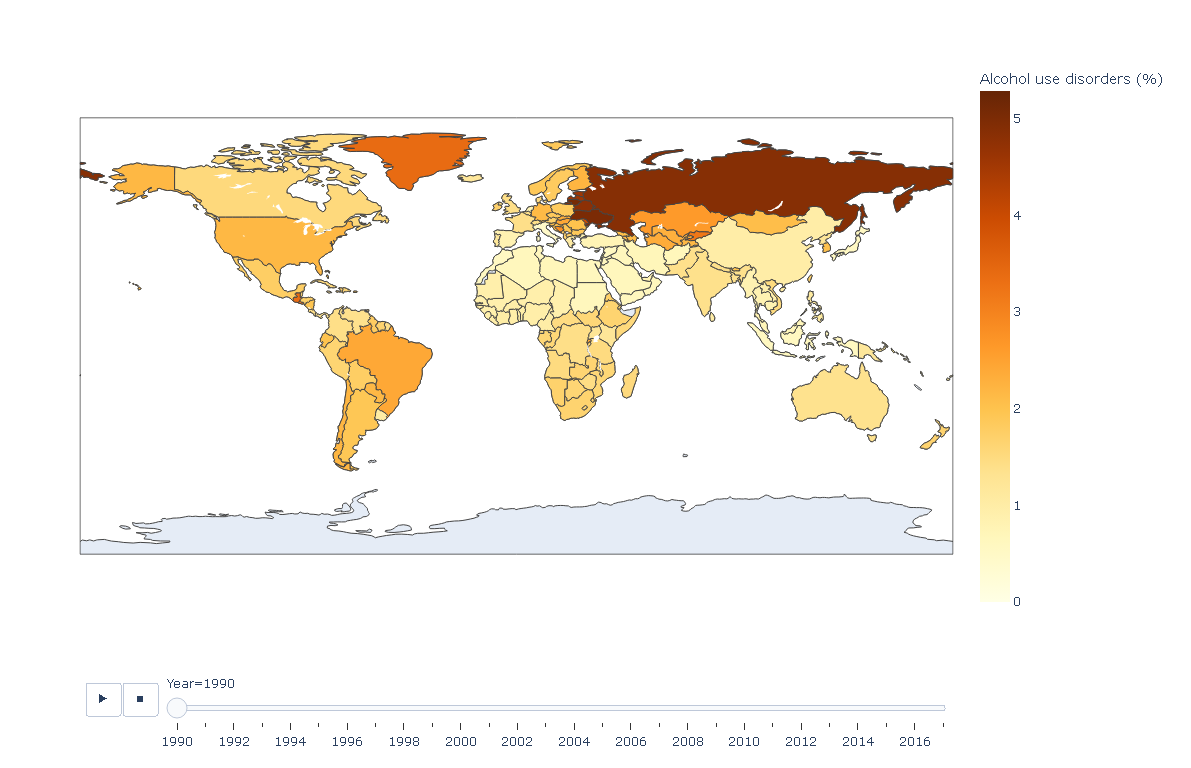

In [15]:
fig = px.choropleth(
                    df,
                    locations='Entity',
                    locationmode="country names",
                    color='Alcohol use disorders (%)', 
                    color_continuous_scale="ylorbr", 
                    range_color=(0, df_code_mean['Alcohol use disorders (%)'].max()), 
                    hover_data = ['Alcohol use disorders (%)'],
                    animation_frame="Year",
                    width=1024,
                    height=768
                   )

fig.show()

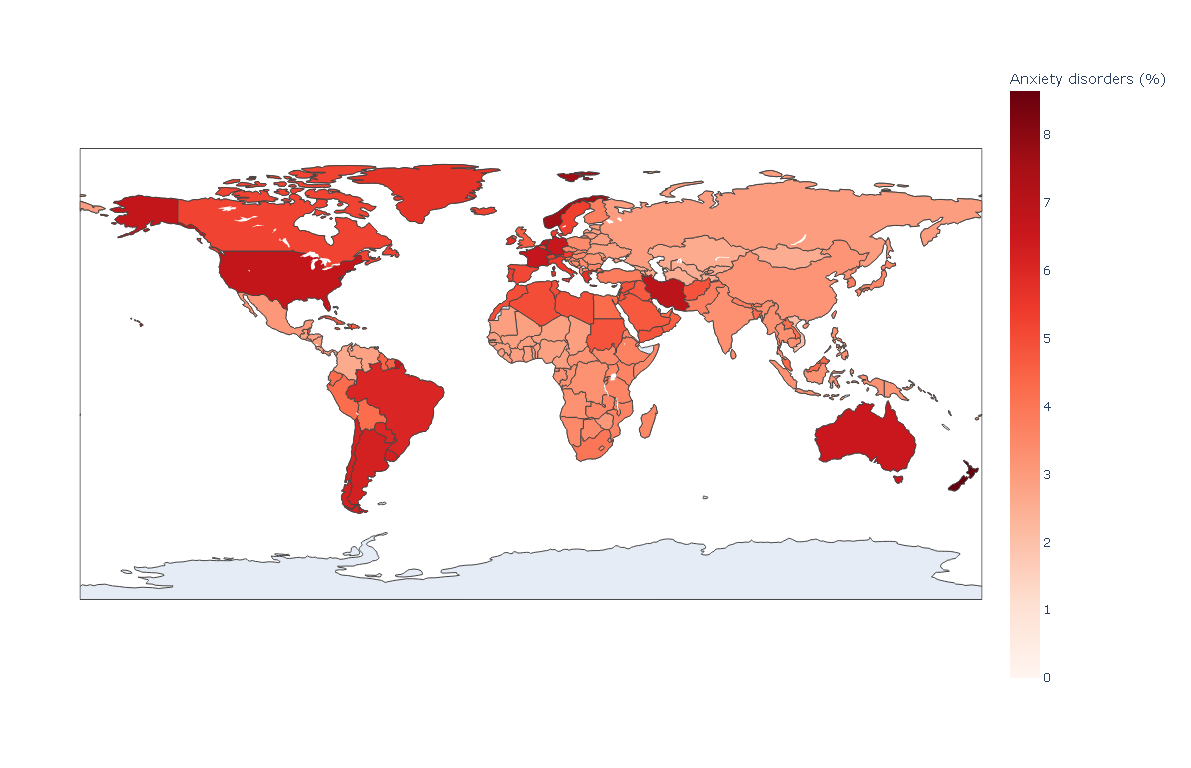

In [16]:
fig = px.choropleth(
                    df_code_mean,
                    locations='Entity',
                    locationmode="country names",
                    color='Anxiety disorders (%)', 
                    color_continuous_scale="Reds", 
                    range_color=(0, df_code_mean['Anxiety disorders (%)'].max()), 
                    hover_data = ['Anxiety disorders (%)'],
                    width=1024,
                    height=768
                   )

fig.show()

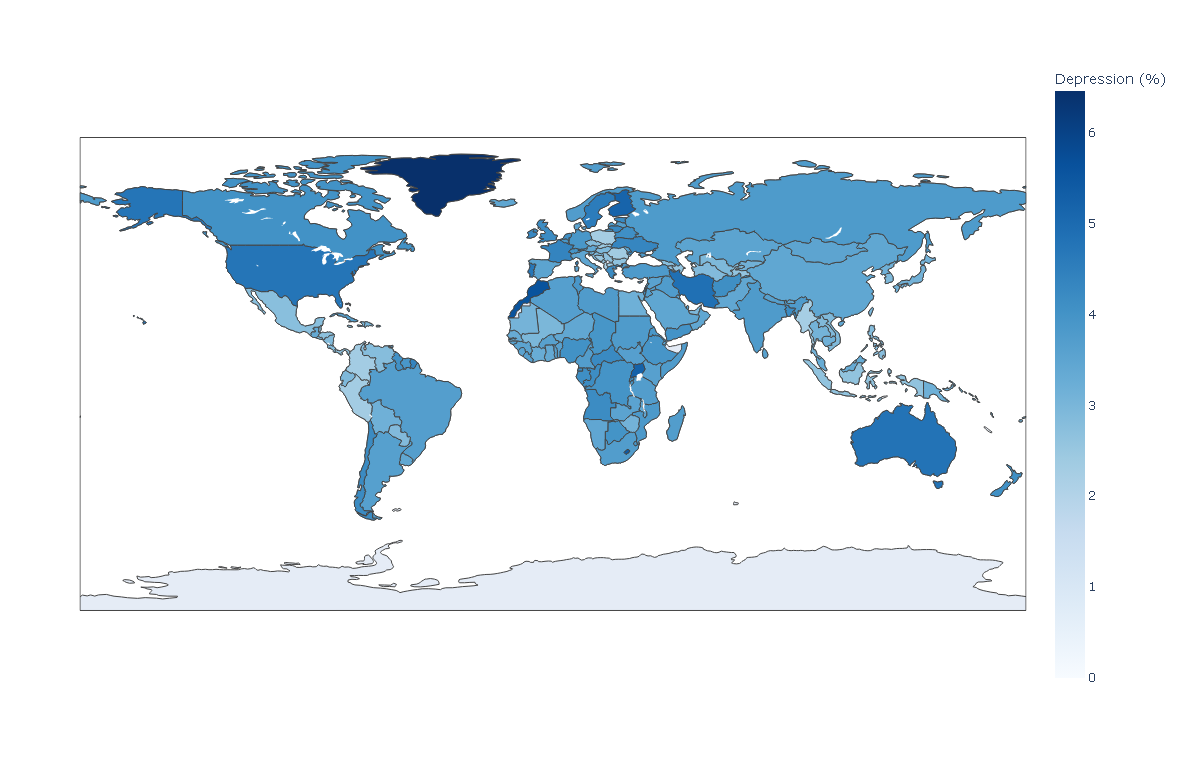

In [17]:
fig = px.choropleth(
                    df_code_mean,
                    locations='Entity',
                    locationmode="country names",
                    color='Depression (%)', 
                    color_continuous_scale="Blues", 
                    range_color=(0, df_code_mean['Depression (%)'].max()), 
                    hover_data = ['Depression (%)'],
                    width=1024,
                    height=768
                   )

fig.show()

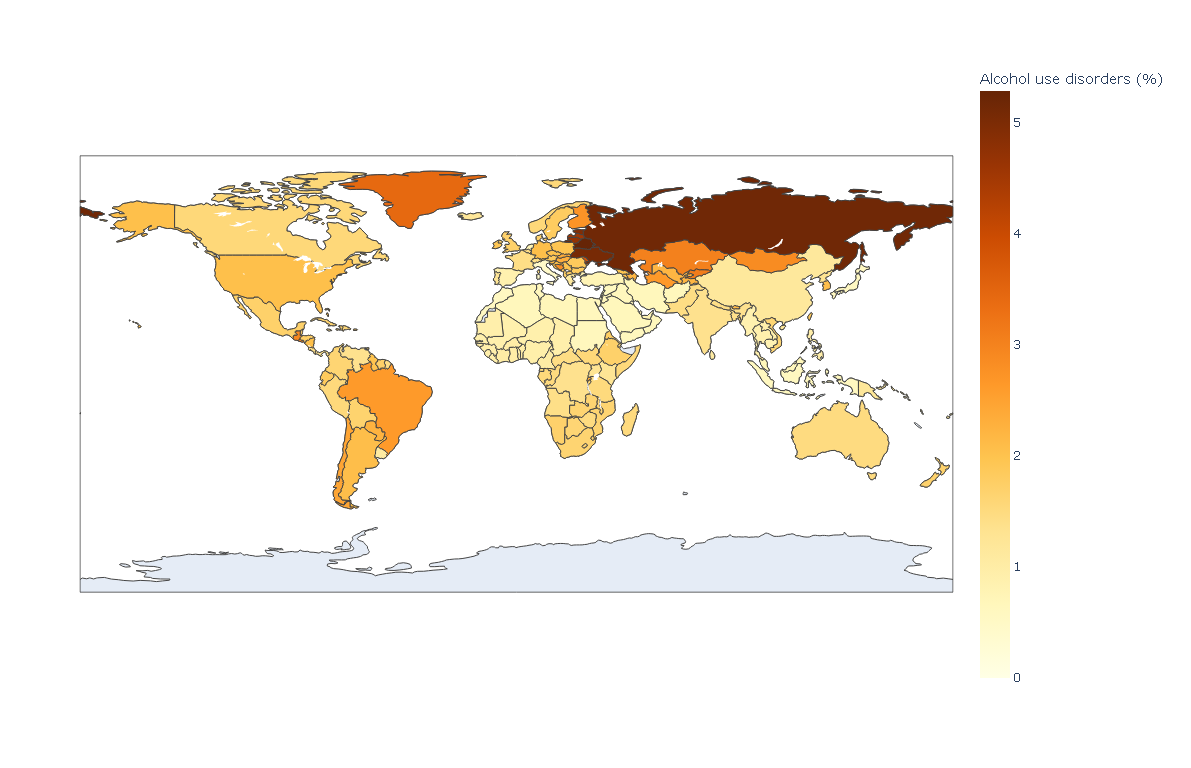

In [18]:
fig = px.choropleth(
                    df_code_mean,
                    locations='Entity',
                    locationmode="country names",
                    color='Alcohol use disorders (%)', 
                    color_continuous_scale="ylorbr", 
                    range_color=(0, df_code_mean['Alcohol use disorders (%)'].max()), 
                    hover_data = ['Alcohol use disorders (%)'],
                    width=1024,
                    height=768
                   )

fig.show()

In [19]:
df_life_expectancy = pd.read_csv("./dataset/World_Health_Statistics_2020_Complete_Geo_Analysis/lifeExpectancyAtBirth.csv")
df_life_expectancy.head()

Location  Period                         Indicator        Dim1  \
0  Afghanistan    2019  Life expectancy at birth (years)  Both sexes   
1  Afghanistan    2019  Life expectancy at birth (years)        Male   
2  Afghanistan    2019  Life expectancy at birth (years)      Female   
3  Afghanistan    2015  Life expectancy at birth (years)  Both sexes   
4  Afghanistan    2015  Life expectancy at birth (years)        Male   

   First Tooltip  
0          63.21  
1          63.29  
2          63.16  
3          61.65  
4          61.04

In [20]:
df_life_expectancy.nunique()

Location          184
Period              5
Indicator           1
Dim1                3
First Tooltip    1580
dtype: int64

In [21]:
df_life_expectancy["Period"].unique()

array([2019, 2015, 2010, 2000, 1920], dtype=int64)

In [27]:
df_life_expectancy_both_sexes = df_life_expectancy[df_life_expectancy["Dim1"] == "Both sexes"]
df_life_expectancy_both_sexes.head()

Location  Period                         Indicator        Dim1  \
0   Afghanistan    2019  Life expectancy at birth (years)  Both sexes   
3   Afghanistan    2015  Life expectancy at birth (years)  Both sexes   
6   Afghanistan    2010  Life expectancy at birth (years)  Both sexes   
9   Afghanistan    2000  Life expectancy at birth (years)  Both sexes   
12      Albania    2019  Life expectancy at birth (years)  Both sexes   

    First Tooltip  
0           63.21  
3           61.65  
6           59.94  
9           54.99  
12          78.00

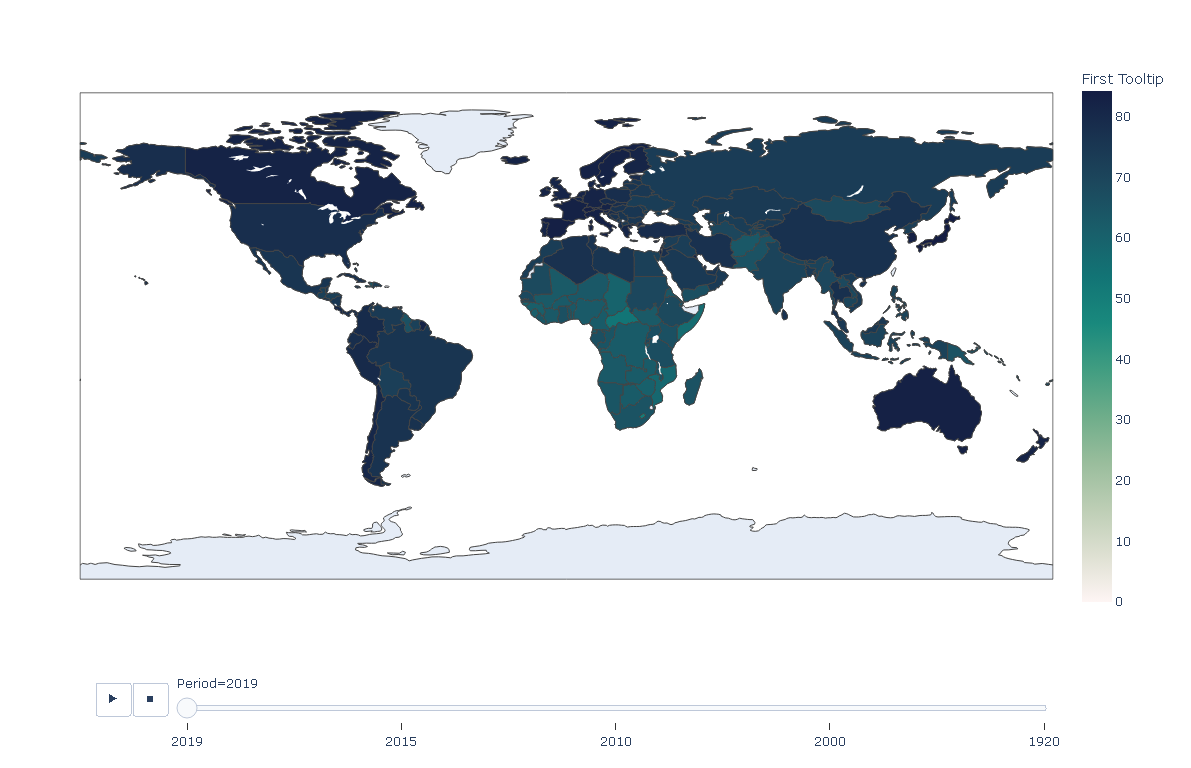

In [28]:
column_select = 'First Tooltip'
fig = px.choropleth(
                    df_life_expectancy_both_sexes,
                    locations='Location',
                    locationmode="country names",
                    color=column_select, 
                    color_continuous_scale="tempo", 
                    range_color=(0, df_life_expectancy_both_sexes[column_select].max()), 
                    hover_data = [column_select],
                    animation_frame="Period",
                    width=1024,
                    height=768
                   )

fig.show()

In [55]:
df_merge = pd.merge(df, df_life_expectancy, how="left", right_on=["Location", "Period"], left_on=["Entity", "Year"])
df_merge.head(20)

Entity Code    Year  Schizophrenia (%)  Bipolar disorder (%)  \
0   Afghanistan  AFG  1990.0           0.160560              0.697779   
1   Afghanistan  AFG  1991.0           0.160312              0.697961   
2   Afghanistan  AFG  1992.0           0.160135              0.698107   
3   Afghanistan  AFG  1993.0           0.160037              0.698257   
4   Afghanistan  AFG  1994.0           0.160022              0.698469   
5   Afghanistan  AFG  1995.0           0.160076              0.698695   
6   Afghanistan  AFG  1996.0           0.160249              0.698914   
7   Afghanistan  AFG  1997.0           0.160554              0.699127   
8   Afghanistan  AFG  1998.0           0.160931              0.699372   
9   Afghanistan  AFG  1999.0           0.161311              0.699674   
10  Afghanistan  AFG  2000.0           0.161621              0.700015   
11  Afghanistan  AFG  2000.0           0.161621              0.700015   
12  Afghanistan  AFG  2000.0           0.161621              0.700015   
13  Afghanistan  AFG  2001.0           0.161957              0.700499   
14  Afghanistan  AFG  2002.0           0.162414              0.701141   
15  Afghanistan  AFG  2003.0           0.162916              0.701860   
16  Afghanistan  AFG  2004.0           0.163377              0.702556   
17  Afghanistan  AFG  2005.0           0.163706              0.703078   
18  Afghanistan  AFG  2006.0           0.163977              0.703517   
19  Afghanistan  AFG  2007.0           0.164302              0.703998   

    Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
0               0.101855               4.828830                1.677082   
1               0.099313               4.829740                1.684746   
2               0.096692               4.831108                1.694334   
3               0.094336               4.830864                1.705320   
4               0.092439               4.829423                1.716069   
5               0.090980               4.828337                1.728112   
6               0.089709               4.828083                1.737643   
7               0.088372               4.827726                1.746891   
8               0.087330               4.826971                1.756963   
9               0.086267               4.826413                1.770791   
10              0.086021               4.827047                1.788395   
11              0.086021               4.827047                1.788395   
12              0.086021               4.827047                1.788395   
13              0.086517               4.831409                1.839123   
14              0.087023               4.838318                1.934326   
15              0.087189               4.845538                2.051106   
16              0.088158               4.851512                2.163044   
17              0.088933               4.854684                2.247443   
18              0.090054               4.856685                2.321020   
19              0.091688               4.858861                2.405564   

    Depression (%)  Alcohol use disorders (%)     Location  Period  \
0         4.071831                   0.672404          NaN     NaN   
1         4.079531                   0.671768          NaN     NaN   
2         4.088358                   0.670644          NaN     NaN   
3         4.096190                   0.669738          NaN     NaN   
4         4.099582                   0.669260          NaN     NaN   
5         4.104207                   0.668746          NaN     NaN   
6         4.107500                   0.667727          NaN     NaN   
7         4.110834                   0.666220          NaN     NaN   
8         4.114438                   0.664676          NaN     NaN   
9         4.117633                   0.663428          NaN     NaN   
10        4.118610                   0.662479  Afghanistan  2000.0   
11        4.118610                   0.662479  Afghanistan 

In [58]:
for column in df_merge.columns:
    df_merge.drop(df_merge[df_merge[column].isna()].index, inplace=True)
    df_merge.reset_index(drop=True, inplace=True)

In [60]:
df_merge.head(10)

Entity Code    Year  Schizophrenia (%)  Bipolar disorder (%)  \
0  Afghanistan  AFG  2000.0           0.161621              0.700015   
1  Afghanistan  AFG  2000.0           0.161621              0.700015   
2  Afghanistan  AFG  2000.0           0.161621              0.700015   
3  Afghanistan  AFG  2010.0           0.165130              0.705313   
4  Afghanistan  AFG  2010.0           0.165130              0.705313   
5  Afghanistan  AFG  2010.0           0.165130              0.705313   
6  Afghanistan  AFG  2015.0           0.165895              0.707275   
7  Afghanistan  AFG  2015.0           0.165895              0.707275   
8  Afghanistan  AFG  2015.0           0.165895              0.707275   
9      Albania  ALB  2000.0           0.194541              0.698437   

   Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
0              0.086021               4.827047                1.788395   
1              0.086021               4.827047                1.788395   
2              0.086021               4.827047                1.788395   
3              0.097327               4.862777                2.571349   
4              0.097327               4.862777                2.571349   
5              0.097327               4.862777                2.571349   
6              0.104445               4.875201                2.543144   
7              0.104445               4.875201                2.543144   
8              0.104445               4.875201                2.543144   
9              0.132704               3.360267                0.492401   

   Depression (%)  Alcohol use disorders (%)     Location  Period  \
0        4.118610                   0.662479  Afghanistan  2000.0   
1        4.118610                   0.662479  Afghanistan  2000.0   
2        4.118610                   0.662479  Afghanistan  2000.0   
3        4.130874                   0.662062  Afghanistan  2010.0   
4        4.130874                   0.662062  Afghanistan  2010.0   
5        4.130874                   0.662062  Afghanistan  2010.0   
6        4.135419                   0.662276  Afghanistan  2015.0   
7        4.135419                   0.662276  Afghanistan  2015.0   
8        4.135419                   0.662276  Afghanistan  2015.0   
9        2.195285                   1.654338      Albania  2000.0   

                          Indicator        Dim1  First Tooltip  
0  Life expectancy at birth (years)  Both sexes          54.99  
1  Life expectancy at birth (years)        Male          54.57  
2  Life expectancy at birth (years)      Female          55.42  
3  Life expectancy at birth (years)  Both sexes          59.94  
4  Life expectancy at birth (years)        Male          59.60  
5  Life expectancy at birth (years)      Female          60.30  
6  Life expectancy at birth (years)  Both sexes          61.65  
7  Life expectancy at birth (years)        Male          61.04  
8  Life expectancy at birth (years)      Female          62.35  
9  Life expectancy at birth (years)  Both sexes          73.55

In [63]:
df_merge_both_sexes = df_merge[df_merge["Dim1"] == "Both sexes"]
df_merge_both_sexes.head()

Entity Code    Year  Schizophrenia (%)  Bipolar disorder (%)  \
0   Afghanistan  AFG  2000.0           0.161621              0.700015   
3   Afghanistan  AFG  2010.0           0.165130              0.705313   
6   Afghanistan  AFG  2015.0           0.165895              0.707275   
9       Albania  ALB  2000.0           0.194541              0.698437   
12      Albania  ALB  2010.0           0.199308              0.703064   

    Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
0               0.086021               4.827047                1.788395   
3               0.097327               4.862777                2.571349   
6               0.104445               4.875201                2.543144   
9               0.132704               3.360267                0.492401   
12              0.160337               3.391246                0.500270   

    Depression (%)  Alcohol use disorders (%)     Location  Period  \
0         4.118610                   0.662479  Afghanistan  2000.0   
3         4.130874                   0.662062  Afghanistan  2010.0   
6         4.135419                   0.662276  Afghanistan  2015.0   
9         2.195285                   1.654338      Albania  2000.0   
12        2.203342                   1.838566      Albania  2010.0   

                           Indicator        Dim1  First Tooltip  
0   Life expectancy at birth (years)  Both sexes          54.99  
3   Life expectancy at birth (years)  Both sexes          59.94  
6   Life expectancy at birth (years)  Both sexes          61.65  
9   Life expectancy at birth (years)  Both sexes          73.55  
12  Life expectancy at birth (years)  Both sexes          76.25

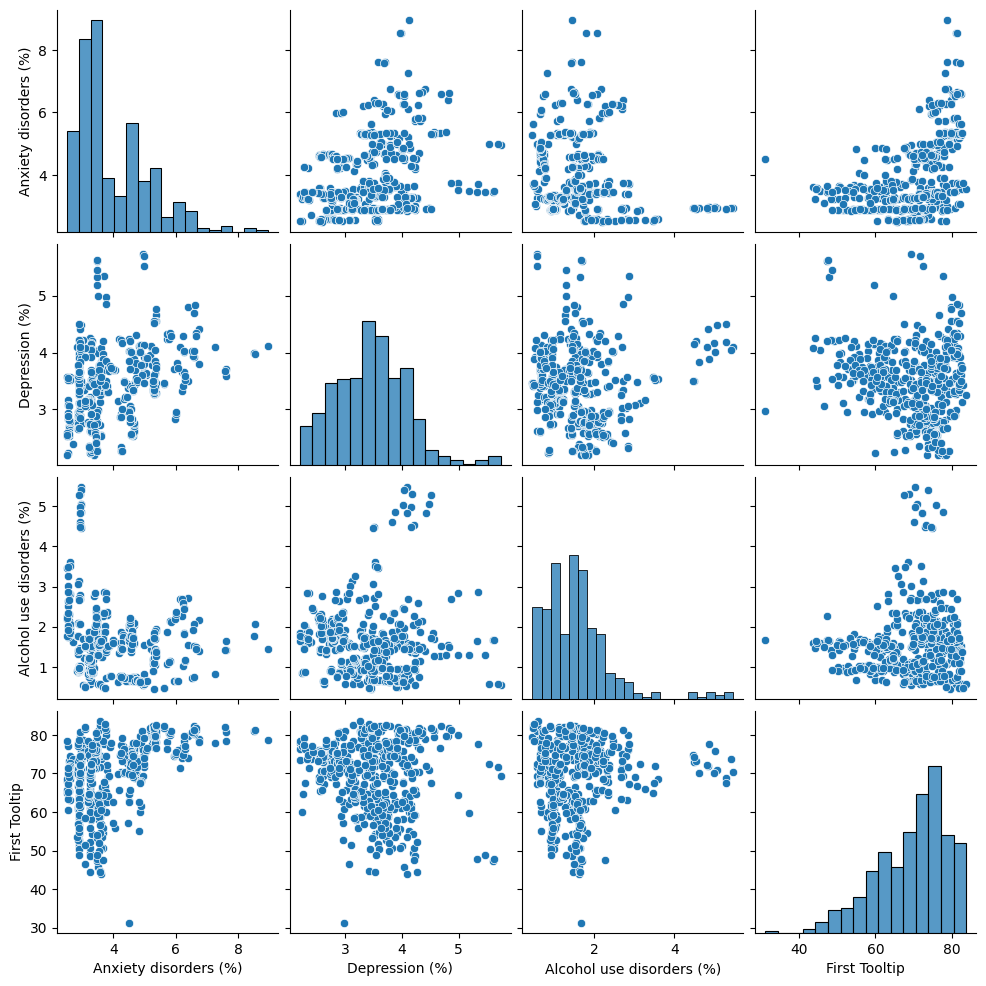

In [65]:
sns.pairplot(df_merge_both_sexes[["Anxiety disorders (%)", "Depression (%)", "Alcohol use disorders (%)", "First Tooltip"]])